In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import streamlit as st
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder
import logging
import io
import re


In [ ]:
import pandas as pd
df = pd.read_excel('/content/Final_Updated_DMA_DATASET_Indian_Names.xlsx')
X = df.drop("job_role_aspiration", axis=1)
y = df["job_role_aspiration"]

# Data check karne ke liye print karein
print("------ FEATURES (X) ------")
print(X.head())

print("\n------ TARGET (y) ------")
print(y.head())

------ FEATURES (X) ------
           name                          email_id        year  \
0  Sanjana Nair  sanjananair@pagesperso-orange.fr    3rd Year   
1  Ananya Verma             ananyaverma@globo.com    2nd Year   
2   Rohan Joshi               rohanjoshi@dmoz.org  Final Year   
3  Vikram Gupta             vikramgupta@mysql.com  1st Year_X   
4   Ayan Sayyed             ayan.sayyed@gmail.com    3rd Year   

      current_course                              technical_skills  \
0          M.Tech AI              Cybersecurity, Cloud Computing_X   
1          B.Tech IT            Python, Java, Cloud Computing, SQL   
2  B.Sc Data Science  Machine Learning, Cybersecurity, Java, SQL_X   
3                BBA             Cloud Computing, Blockchain, Java   
4             B.Tech              Data Analysis, Cloud Computing_X   

  programming_languages    rating                                 soft_skills  \
0           Java, C#, R  2.930187         Teamwork, Leadership, Communication   

In [ ]:
df.head()

,name,email_id,year,current_course,technical_skills,programming_languages,rating,soft_skills,rating.1,projects,job_role_aspiration,challenges_faced,career_support_needed,preferred_learning_method
0,Sanjana Nair,sanjananair@pagesperso-orange.fr,3rd Year,M.Tech AI,"Cybersecurity, Cloud Computing_X","Java, C#, R",2.930187,"Teamwork, Leadership, Communication",4.052759,Yes,Software Developer,Limited guidance,Mentorship programs,Online
1,Ananya Verma,ananyaverma@globo.com,2nd Year,B.Tech IT,"Python, Java, Cloud Computing, SQL","Java, JavaScript",2.912444,"Communication, Time Management",2.970611,Yes,AI Engineer_X,Lack of experience_X,Technical skill training_X,Bootcamp_X
2,Rohan Joshi,rohanjoshi@dmoz.org,Final Year,B.Sc Data Science,"Machine Learning, Cybersecurity, Java, SQL_X",R,2.044163,"Teamwork, Communication, Adaptability",0.962405,Yes,Cybersecurity Expert,Interview anxiety,Mentorship programs,Self-study
3,Vikram Gupta,vikramgupta@mysql.com,1st Year_X,BBA,"Cloud Computing, Blockchain, Java","C#, Python",2.112412,"Problem-Solving, Teamwork, Time Management",2.856560,Yes,Cybersecurity Expert,No networking opportunities,Internship opportunities,Bootcamp
4,Ayan Sayyed,ayan.sayyed@gmail.com,3rd Year,B.Tech,"Data Analysis, Cloud Computing_X",C++,1.002671,"Communication, Teamwork, Time Management",4.171992,No,AI Engineer,Difficulty in resume building,Mentorship programs,Online


In [ ]:
df.tail()

,name,email_id,year,current_course,technical_skills,programming_languages,rating,soft_skills,rating.1,projects,job_role_aspiration,challenges_faced,career_support_needed,preferred_learning_method
2495,Arjun Verma,arjunverma@over-blog.com,1st Year,BBA,"Blockchain, Java, Cybersecurity, SQL",JavaScript,1.033406,"Leadership, Teamwork",1.024478,No,Data Scientist_X,Difficulty in resume building,Internship opportunities,College curriculum
2496,Rohan Nair,rohannair@nymag.com,1st Year,MBA,"Python, Blockchain","R, JavaScript, Java",2.098272,"Communication, Problem-Solving, Time Management",4.985840,Yes,Cloud Architect,Limited guidance,Mentorship programs,College curriculum
2497,Karthik Gupta_X,karthikgupta@friendfeed.com_X,3rd Year,B.Sc Data Science,"Blockchain, Python, Cloud Computing",Python,2.073156,"Teamwork, Problem-Solving",4.038051,Yes,AI Engineer,Lack of experience,Resume workshops,College curriculum
2498,Priya Joshi,priyajoshi@geocities.jp,Final Year,MBA_X,"Machine Learning, Java","C++, Java",5.078693,"Teamwork, Time Management, Adaptability",1.048380,Yes,AI Engineer,Difficulty in resume building,Resume workshops,Bootcamp
2499,Rohan Verma,rohanverma@squarespace.com_X,Final Year,B.Tech CSE,"Cybersecurity, Python, SQL","Java, R_X",3.050335,"Leadership, Problem-Solving, Time Management",0.929470,No,Software Developer,Interview anxiety,Technical skill training,Online


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       2500 non-null   object 
 1   email_id                   2500 non-null   object 
 2   year                       2500 non-null   object 
 3   current_course             2500 non-null   object 
 4   technical_skills           2500 non-null   object 
 5   programming_languages      2500 non-null   object 
 6   rating                     2500 non-null   float64
 7   soft_skills                2500 non-null   object 
 8   rating.1                   2500 non-null   float64
 9   projects                   2500 non-null   object 
 10  job_role_aspiration        2500 non-null   object 
 11  challenges_faced           2500 non-null   object 
 12  career_support_needed      2500 non-null   object 
 13  preferred_learning_method  2500 non-null   objec

In [ ]:
df.isnull().sum()

,0
name,0
email_id,0
year,0
current_course,0
technical_skills,0
programming_languages,0
rating,0
soft_skills,0
rating.1,0
projects,0


In [ ]:
df.describe()

,rating,rating.1
count,2500.000000,2500.000000
mean,2.943735,2.945711
std,1.408610,1.442212
min,0.785041,0.820915
25%,1.950717,1.914116
50%,2.983548,2.993185
75%,4.028709,4.045471
max,5.236144,5.247404


In [ ]:
df['job_role_aspiration'].value_counts()

,count
job_role_aspiration,
Cloud Architect,424
Software Developer,406
Data Scientist,379
Cybersecurity Expert,357
Business Analyst,353
AI Engineer,335
Software Developer_X,51
Cybersecurity Expert_X,41
Data Scientist_X,41


In [ ]:
df['job_role_aspiration'].describe()

,job_role_aspiration
count,2500
unique,12
top,Cloud Architect
freq,424


In [ ]:
# Har job role ke liye zaroori skills ki list
job_skill_requirements = {
    'Software Developer': ['Java', 'Python', 'SQL', 'Data Structures', 'Problem-Solving', 'Teamwork'],
    'AI Engineer': ['Python', 'Machine Learning', 'TensorFlow', 'PyTorch', 'Deep Learning', 'Statistics'],
    'Data Scientist': ['Python', 'R', 'SQL', 'Machine Learning', 'Statistics', 'Data Visualization'],
    'Cloud Architect': ['Cloud Computing', 'AWS', 'Azure', 'Networking', 'Docker', 'Kubernetes'],
    'Cybersecurity Expert': ['Cybersecurity', 'Networking', 'Python', 'Cryptography', 'Ethical Hacking']
}

# Function jo skill gap calculate karega
def analyze_skill_gap(row):
    job_role = row['job_role_aspiration']
    if job_role not in job_skill_requirements:
        return 0, []  # (gap, missing_skills)

    required = set(s.lower() for s in job_skill_requirements[job_role])
    student_skills = set(s.lower().strip() for s in re.split(r'[,\s]+', str(row['technical_skills']) + ',' + str(row['soft_skills'])) if s)
    missing = list(required - student_skills)

    # Agar 50% se zyada skills missing hain, toh gap hai
    gap = 1 if len(required) > 0 and (len(missing) / len(required)) > 0.5 else 0
    return gap, missing

# Is function ko poore dataset par apply karke naye columns banayein
df[['skill_gap', 'missing_skills']] = df.apply(analyze_skill_gap, axis=1, result_type='expand')

print("'skill_gap' aur 'missing_skills' columns successfully ban gaye.")
print(df[['name', 'job_role_aspiration', 'skill_gap']].head())

'skill_gap' aur 'missing_skills' columns successfully ban gaye.
           name   job_role_aspiration  skill_gap
0  Sanjana Nair    Software Developer          1
1  Ananya Verma         AI Engineer_X          0
2   Rohan Joshi  Cybersecurity Expert          1
3  Vikram Gupta  Cybersecurity Expert          1
4   Ayan Sayyed           AI Engineer          1


In [ ]:
# Skills ko process karne ke liye ek 'all_skills' column banayein
df['all_skills'] = df['technical_skills'].str.cat(df['soft_skills'], sep=',')

# Features (X) aur Target (y) ko alag karein
X = df[['current_course', 'year', 'all_skills']]
y = df['skill_gap']

# Har skill ko alag column banayein
X.loc[:, 'all_skills'] = X['all_skills'].apply(lambda x: [skill.strip() for skill in str(x).split(',')])
mlb = MultiLabelBinarizer()
skills_encoded = mlb.fit_transform(X['all_skills'])
skills_df = pd.DataFrame(skills_encoded, columns=mlb.classes_, index=X.index)

# Course aur Year ko numbers mein badlein
categorical_features = ['current_course', 'year']
one_hot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_cats = one_hot.fit_transform(X[categorical_features])
encoded_cats_df = pd.DataFrame(encoded_cats, columns=one_hot.get_feature_names_out(categorical_features), index=X.index)

# Sabhi taiyaar features ko jodein
X_processed = pd.concat([encoded_cats_df, skills_df], axis=1)

print(" Data is Ready for Model BUilt")
print(f"Total features: {X_processed.shape[1]}")

 Data is Ready for Model BUilt
Total features: 50


In [ ]:
# Data ko training aur testing hisson mein baantein
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.25, random_state=42)

# Model banayein aur train karein
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model ki performance check karein
y_pred = model.predict(X_test)
print("---  Model Evaluation Results  ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred, zero_division=0))

---  Model Evaluation Results  ---
Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.84      0.70      0.76       184
           1       0.88      0.94      0.91       441

    accuracy                           0.87       625
   macro avg       0.86      0.82      0.84       625
weighted avg       0.87      0.87      0.87       625



In [ ]:
# --- Interactive Input Section ---

# Prepare options to show the user from the dataset
course_options = df['current_course'].unique()
year_options = df['year'].unique()
job_options = list(job_skill_requirements.keys())

print("---  Predict Your Skill Gap  ---")
print("\nPlease provide the information below.")

# Display options for Job Aspiration and get user input
print("\nWhich of these Job Roles are you aspiring for?")
for job in job_options:
    print(f"- {job}")
job_aspiration = input("Type your answer here: ")

# Get input for the course
course = input(f"\nWhat is your current course? (e.g., {course_options[0]}): ")

# Get input for the year
year = input(f"Which year are you in? (e.g., {year_options[0]}): ")

# Get input for skills
tech_skills = input("\nWhat Technical Skills do you have? (separate with a comma, e.g., Python, Java, SQL): ")
soft_skills = input("What Soft Skills do you have? (e.g., Leadership, Teamwork): ")

# Create a dictionary from the user's input
new_student_data = {
    'current_course': course,
    'year': year,
    'job_role_aspiration': job_aspiration,
    'technical_skills': tech_skills,
    'soft_skills': soft_skills
}


# --- Prediction Section (No changes here) ---

# Preprocess the new student's data to match the model's format
new_student_skills_list = [s.strip() for s in (new_student_data['technical_skills'] + ',' + new_student_data['soft_skills']).split(',')]
new_df = pd.DataFrame({'current_course': [new_student_data['current_course']], 'year': [new_student_data['year']], 'all_skills': [new_student_skills_list]})
new_skills_encoded = mlb.transform(new_df['all_skills'])
new_cats_encoded = one_hot.transform(new_df[['current_course', 'year']])
new_processed_df = pd.concat([pd.DataFrame(new_cats_encoded, columns=one_hot.get_feature_names_out()), pd.DataFrame(new_skills_encoded, columns=mlb.classes_)], axis=1)
new_processed_df = new_processed_df.reindex(columns=X_processed.columns, fill_value=0)

# Make the prediction
prediction = model.predict(new_processed_df)
proba = model.predict_proba(new_processed_df)


# --- Display Results ---

print("\n----------------------------------------------------")
print("\n---  Your Prediction & Recommendation  ---")
print(f"Your Aspiration: {new_student_data['job_role_aspiration']}")

if new_student_data['job_role_aspiration'] not in job_skill_requirements:
    print("\nSorry, we do not have data for this job role yet.")
elif prediction[0] == 1:
    print(f"Prediction: **Skill Gap Exists** (Probability: {proba[0][1]:.2f})")
    required = set(s.lower() for s in job_skill_requirements[new_student_data['job_role_aspiration']])
    owned = set(s.lower() for s in new_student_skills_list)
    recommendations = list(required - owned)
    print("\n**Recommendations to bridge the gap:**")
    if recommendations:
        for skill in recommendations:
            print(f"  - Learn **{skill.title()}**")
    else:
        print("  You have the necessary skills, but you should practice them more.")
else:
    print(f"Prediction: **No Significant Skill Gap** (Probability: {proba[0][0]:.2f})")
    print("\nYou are on the right track! Keep improving your skills.")

print("\n----------------------------------------------------")

---  Predict Your Skill Gap  ---

Please provide the information below.

Which of these Job Roles are you aspiring for?
- Software Developer
- AI Engineer
- Data Scientist
- Cloud Architect
- Cybersecurity Expert



--- 📈 Data Visualization 📈 ---


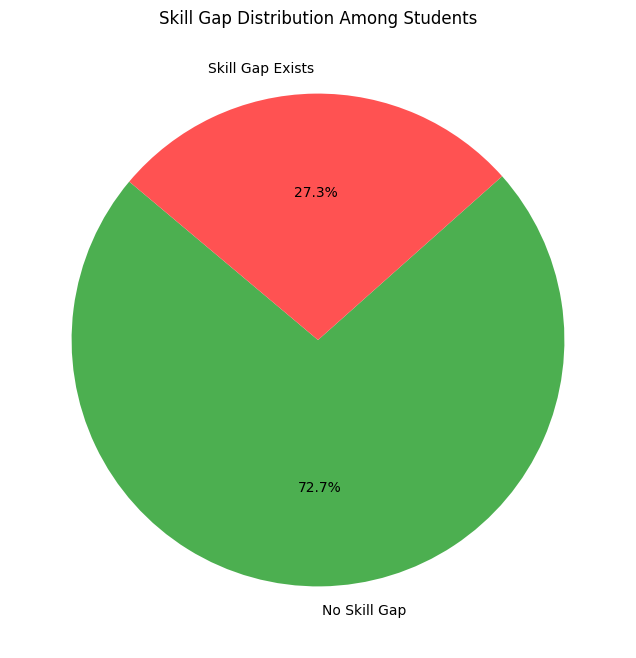

In [ ]:
print("\n--- 📈 Data Visualization 📈 ---")
gap_counts = df['skill_gap'].value_counts()
labels = ['No Skill Gap', 'Skill Gap Exists']

plt.figure(figsize=(8, 8))
plt.pie(gap_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#4CAF50', '#FF5252'])
plt.title('Skill Gap Distribution Among Students')
plt.show()